# Use financial criteria and probability criteria to evaluate Neural Network model 

In [1]:
# import libraries
import pandas as pd
import warnings
import sys
import os

warnings.filterwarnings("ignore") # Ignore warnings

# Get the absolute path of the `src` folder
src_path = os.path.abspath(os.path.join(os.getcwd(), "..", "src"))

# Add `src` to the system path
sys.path.insert(0, src_path)

from tests.hypothesisTest import hypothesisTest
from tests.financialTest import financialTest

## Financial Test

In [2]:
df = pd.read_csv('../data/processed/VNINDEX_add_features.csv')
in_sample_total_profit, total_trade_number, win_rate, profit_factor = financialTest(df,model='NeuralNetwork',feature_columns=['Net_advances','A/D','Schultz','McClellan_Oscillator'],target_column='daily_returns')
print(f'Total profit: {in_sample_total_profit}')
print(f'Total trade number: {total_trade_number}')
print(f'Win rate: {win_rate}')
print(f'Profit factor: {profit_factor}')


(6423, 4)
(6423,)
41/41 [==============================] - 0s 534us/step
Finally capital:  2002191.7828000013
The model helps us to get profit
The win rate is higher than 0.5 and lower than 0.8
The profit factor is higher than 1, that's good
Total profit: 2191.782800001325
Total trade number: 162
Win rate: 0.6111111111111112
Profit factor: 1.1146362952195958


## Hypothesis Test

In [3]:
data = []
for i in range(100):
    df = pd.read_csv(f'../data/processed/out_of_sample_{i+1}.csv')
    data.append(df)
total_profit_list = hypothesisTest(data,model='NeuralNetwork',feature_columns=['Net_advances','A/D','Schultz','McClellan_Oscillator'],target_column='daily_returns',financial_feature='total_profit')
total_profit_list = [float(total_profit) for total_profit in total_profit_list]
print(f'Total profit list: {total_profit_list}')

(6423, 4)
(6423,)
41/41 [==============================] - 0s 535us/step
Finally capital:  2004258.0431902134
Finally capital:  2003021.2164164032
Finally capital:  2005368.3425172046
Finally capital:  2004068.9149110871
Finally capital:  2003228.181648203
Finally capital:  2004563.9840842963
Finally capital:  2001439.8331575773
Finally capital:  2001977.8924513888
Finally capital:  2006196.988467277
Finally capital:  2004985.501793088
Finally capital:  2000152.495330524
Finally capital:  2005627.1784355834
Finally capital:  2001051.6537966505
Finally capital:  2002571.9349090448
Finally capital:  2002761.5395945718
Finally capital:  2001364.4645186712
Finally capital:  2004056.2821170276
Finally capital:  2005236.8758820973
Finally capital:  2001742.3512622616
Finally capital:  2004085.9654262364
Finally capital:  2005392.3845239382
Finally capital:  2002393.593591415
Finally capital:  2005946.7435971824
Finally capital:  2001627.332650432
Finally capital:  2003580.2357386334
Finally 

# Plot data to compare between LinearRegression, DecisionTree, RandomForest

DecisionTree profit 1970.641 lies in the center of the distribution.
p-value: 0.670
Since p-value >= 0.1, we fail to reject H0. We can't beat that monkey.
LinearRegression profit -9132.414 lies in the left tail of the distribution.
p-value: 1.000
Since p-value >= 0.1, we fail to reject H0. We can't beat that monkey.
RandomForest profit 2729.838 lies in the center of the distribution.
p-value: 0.520
Since p-value >= 0.1, we fail to reject H0. We can't beat that monkey.
NeuralNetwork profit 2191.783 lies in the center of the distribution.
p-value: 0.630
Since p-value >= 0.1, we fail to reject H0. We can't beat that monkey.


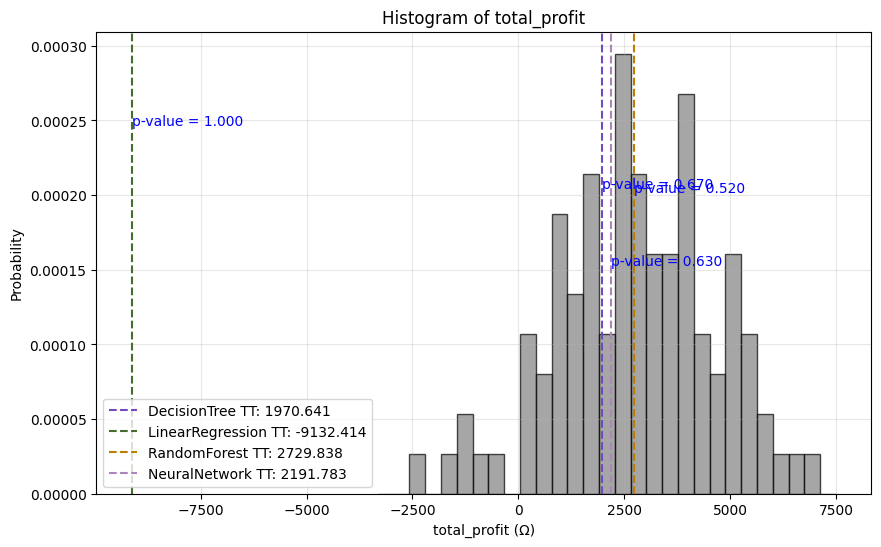

In [4]:
from visualization.histogram import plot_histogram
plot_histogram(total_profit_list,{'DecisionTree':1970.641,'LinearRegression':-9132.414043806493,'RandomForest':2729.837818058906,'NeuralNetwork':in_sample_total_profit})